In [1]:
#import numpy as np

#data = np.load(r"/home/rosario/explainable/Bachelor/Results/Num_Epochs_5batchSize_42023-01-14_172750/featureListALL.npz")
#a = data["featureListALL"][0]
#for i in a:
#    if i != 0.0 and i != 1.0: 
#        print(repr(np.float64(i)))
        

In [14]:
import numpy as np

#rulesResults = np.load("/home/rosario/Bachelor/WorkingResults/_2023-08-14_11:19:14.npz", allow_pickle=True)
#trainResults = np.load("/home/rosario/Bachelor/WorkingResults/data.npz", allow_pickle=True)

rulesResults = np.load("/home/rosario/Bachelor/NLP_Results/rulesResults/discriminative_rules/_2023-08-15_22:26:26.npz", allow_pickle=True)
trainResults = np.load("NLP_Results/Trainingresults/data.npz", allow_pickle=True)


#rulesResults = np.load("/home/rosario/Bachelor/Results/rulesResults/discriminative_rules/_2023-08-04_09:33:29.npz", allow_pickle=True)
#trainResults = np.load("/home/rosario/Bachelor/Results/Trainingresults/data.npz", allow_pickle=True)



# = np.load("./WorkingResults/rulesResults/discriminative_rules/_2023-07-21_10:45:16.npz")

for i in rulesResults:
    print(i)
#print("----")
len(rulesResults["labelList_rules_overIterations"])





rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
globalCoverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
cosineSimilarity_overIterations
overlapSimilarity_overIterations
diceSimilarity_overIterations
raw_rules_overIterations
numberOfGeneratedRulesRAW_overIterations
rulePrecisionListPerRule_overIterations
trackedRules_OHE


251

In [3]:
for i in rulesResults:
    print(i)
    #print(rulesResults[str("trackedRules_OHE")])

rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
globalCoverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
cosineSimilarity_overIterations
overlapSimilarity_overIterations
diceSimilarity_overIterations
raw_rules_overIterations
numberOfGeneratedRulesRAW_overIterations
rulePrecisionListPerRule_overIterations
trackedRules_OHE


In [4]:
#changes binnned in n_sized bins 
    # count how often the apprearance of a rule has changed over iterations 
import numpy as np
#trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
#                                  [0,0,0,0,0,0,0,0,1],
 #                                 [0,0,0,0,1,1,0,0,0]])

def getchangeTrackerList(trackedRules_OHE):
    #transpore
    trackedRules_OHE = np.array(trackedRules_OHE).transpose()

    #now we have over the rows the iterarations  
    # and over the colums the rules   
    """
        iterations   -> 
        [[1 1 1 0 0]
      ^ [1 0 0 1 0]
      | [0 1 1 0 1]]
    rules list

    
    """
    #trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
    ##                              [0,0,0,0,0,0,0,0,1],
    #                              [0,0,0,0,1,1,0,0,0]])
    changeTrackerList =[]
    for i in trackedRules_OHE:
        temp = -1
        changeTracker = []
        for j in range(len(i)):
            #if i[j] != 0:
                if i[j] != temp:
                    changeTracker.append(1)
                    temp = i[j]
                else:
                    changeTracker.append(0)
                    temp = i[j]
        changeTrackerList.append(changeTracker)

    return changeTrackerList

changeTrackerList = getchangeTrackerList(rulesResults["trackedRules_OHE"])#(rulesResults["trackedRules_OHE"])

#print(changeTrackerList)
#print(len(changeTrackerList))

#trackedRules_OHE  = [[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],]
                                  
print(rulesResults["trackedRules_OHE"])
def countConsequtiveRuleApperance(trackedRules_OHE,n):
    ruleAtIterationIsImportant_List = []
    for i in trackedRules_OHE:
        #print(i)
        ruleAtIterationIsImportant =[]
        for j in range(0,len(i)):
            #print("j")
            #print(j)

            
            #print(j)
           # print(n)
           # print(j<=n)
            if j < n -1:
                #print("ok?")
                ruleAtIterationIsImportant.append(0) #0 is not important | cause n iterations not reached yet
            elif j > (len(i) -n):
                ruleAtIterationIsImportant.append(0)
            else:
                tempConsequentApperanceCounter = list(i[j:j+n]).count(1)
                #print("a")
                #print(tempConsequentApperanceCounter)
                #print(i[j:j+n].count(1))
                #print("aaaa")
                #print(tempConsequentApperanceCounter)
                if tempConsequentApperanceCounter == n:
                   # print("asasasdaas")
                    ruleAtIterationIsImportant.append(1) # is imortant at iteration
                else:
                    ruleAtIterationIsImportant.append(0)
        #print(ruleAtIterationIsImportant)
        ruleAtIterationIsImportant_List.append(ruleAtIterationIsImportant)

    return ruleAtIterationIsImportant_List

ruleAtIterationIsImportant_List_3= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],3)
ruleAtIterationIsImportant_List_5= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],5)
ruleAtIterationIsImportant_List_10= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],10)
ruleAtIterationIsImportant_List_20= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],20)
ruleAtIterationIsImportant_List_50= countConsequtiveRuleApperance(rulesResults["trackedRules_OHE"],50)

print(len(ruleAtIterationIsImportant_List_3))
print(len(ruleAtIterationIsImportant_List_5))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]]
251
251


[4, 62, 40, 0, 32, 0, 1, 9, 61, 51, 155, 3, 12, 27, 62, 4, 40, 0, 13, 10, 155, 1, 42, 15, 58, 4, 32, 8, 1, 16, 47, 68, 7, 28, 22, 155, 0, 26, 27, 12, 155, 2, 155, 4, 44, 35, 1, 1, 7, 5, 68, 20, 66, 8, 16, 37, 9, 18, 21, 32, 5, 28, 3, 39, 2, 2, 0, 2, 8, 1, 5, 48, 0, 0, 11, 33, 21, 45, 34, 11, 34, 2, 2, 31, 37, 20, 1, 7, 10, 0, 31, 4, 35]
93
[44, 4, 8, 40, 14, 44, 104, 24, 12, 12, 1, 13, 31, 24, 16, 50, 3, 42, 17, 20, 1, 27, 15, 19, 19, 16, 36, 39, 42, 4, 21, 17, 33, 31, 17, 1, 29, 21, 33, 22, 1, 24, 1, 30, 21, 17, 22, 27, 15, 32, 9, 24, 7, 26, 26, 22, 62, 22, 7, 17, 14, 42, 51, 16, 32, 16, 47, 31, 23, 31, 30, 11, 21, 53, 35, 14, 23, 35, 21, 15, 9, 21, 35, 13, 36, 7, 21, 22, 38, 18, 44, 11, 7]
93
23.881720430107528


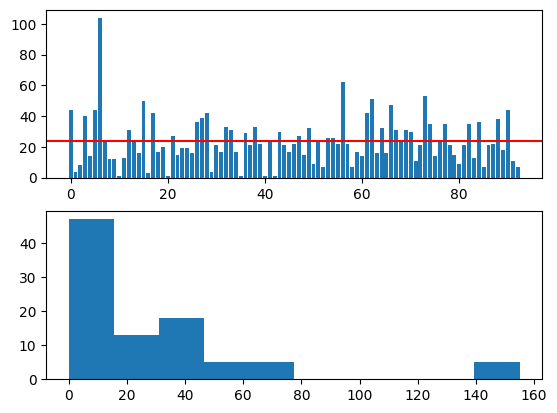

In [17]:
trackedRules_OHE  = np.array([[1,0,1,1,1,1,0,0,1],
                              [0,0,0,0,0,0,0,0,1],
                              [0,0,0,0,1,1,0,0,0]])
#%matplotlib qt 
def getOccurrences(trackedRules_OHE):
    """
    returns fistOccurences , occurencesCounter
    """
    firstOccurrences_List = []
    occurencesCounter_List =[]

    #for i in trackedRules_OHE:
    
    trackedRules_OHE= np.array(trackedRules_OHE).transpose()
    for i in trackedRules_OHE:
        occurencesCounter_List.append(list(i).count(1))
        for index, j in enumerate(i):
            

            if j == 1:
                firstOccurrences_List.append(index)
                break
    print(firstOccurrences_List)
    print(len(firstOccurrences_List))
    print(occurencesCounter_List)
    print(len(occurencesCounter_List))

    return firstOccurrences_List , occurencesCounter_List

firstOccurrences_List , occurencesCounter_List = getOccurrences(rulesResults["trackedRules_OHE"])
#TEMPNAME(trackedRules_OHE)
from matplotlib import pyplot as plt


figAcc, axsAcc = plt.subplots(nrows=2, ncols=1)

axsAcc[1].hist(firstOccurrences_List)
axsAcc[0].bar(range(len(occurencesCounter_List)), occurencesCounter_List)
print(np.mean(occurencesCounter_List))
axsAcc[0].axhline(np.mean(occurencesCounter_List), color='r')
#axsAcc.axhline(np.std(occurencesCounter_List), color='g')

#print(len(rulesResults["trackedRules_OHE"]))
#print(len(rulesResults["trackedRules_OHE"][0]))
plt.show()


[0.54913295 0.5433526  0.5433526  0.56069364 0.6300578  0.48554913
 0.4566474  0.4566474  0.4566474  0.4566474  0.4566474  0.4566474
 0.4566474  0.4566474  0.4566474  0.4566474  0.4566474  0.4566474
 0.4566474  0.46820809 0.49710983 0.5433526  0.58381503 0.67630058
 0.7283237  0.75722543 0.75144509 0.78612717 0.76878613 0.78034682
 0.76300578 0.79768786 0.80346821 0.8265896  0.8265896  0.8265896
 0.80346821 0.80346821 0.80346821 0.75144509 0.75722543 0.75144509
 0.74566474 0.71676301 0.70520231 0.70520231 0.76300578 0.80346821
 0.8150289  0.82080925 0.83815029 0.83815029 0.83815029 0.83815029
 0.8265896  0.8265896  0.82080925 0.82080925 0.8150289  0.8150289
 0.8265896  0.86705202 0.83815029 0.82080925 0.80924855 0.79190751
 0.77456647 0.79190751 0.80924855 0.80346821 0.79190751 0.8150289
 0.8150289  0.8265896  0.83236994 0.83236994 0.84393064 0.85549133
 0.86127168 0.86705202 0.86705202 0.86705202 0.87283237 0.84393064
 0.83815029 0.83236994 0.83236994 0.83815029 0.84393064 0.86127168


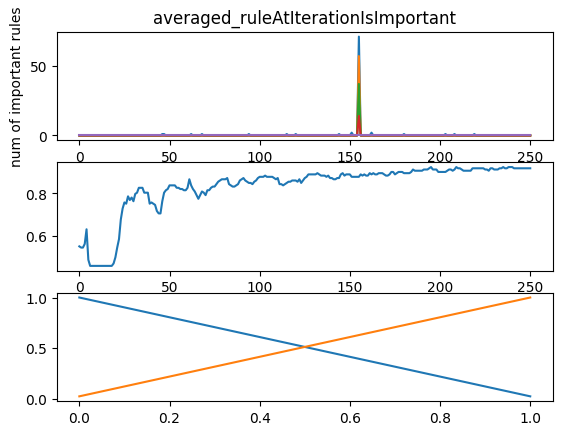

In [19]:
averaged_ruleAtIterationIsImportant_List_3 = []
averaged_ruleAtIterationIsImportant_List_5 = []
averaged_ruleAtIterationIsImportant_List_10 = []
averaged_ruleAtIterationIsImportant_List_20 = []
averaged_ruleAtIterationIsImportant_List_50 = []

for i in range(len(ruleAtIterationIsImportant_List_3)):
    #print(i)
    averaged_ruleAtIterationIsImportant_List_3.append(ruleAtIterationIsImportant_List_3[i].count(1))
    averaged_ruleAtIterationIsImportant_List_5.append(ruleAtIterationIsImportant_List_5[i].count(1))
    averaged_ruleAtIterationIsImportant_List_10.append(ruleAtIterationIsImportant_List_10[i].count(1))
    averaged_ruleAtIterationIsImportant_List_20.append(ruleAtIterationIsImportant_List_20[i].count(1))
    averaged_ruleAtIterationIsImportant_List_50.append(ruleAtIterationIsImportant_List_50[i].count(1))




#print(max(averaged_ruleAtIterationIsImportant_List))
#print(min(averaged_ruleAtIterationIsImportant_List))

import matplotlib.pyplot as plt

figAcc, axsAcc = plt.subplots(nrows=3, ncols=1)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc[0].set_title("averaged_ruleAtIterationIsImportant")
axsAcc[0].set_xlabel("iteration")
axsAcc[0].set_ylabel("num of important rules")
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_3, label='consequent apperance: 3')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_5, label='consequent apperance: 5')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_10, label='consequent apperance: 10')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_20, label='consequent apperance: 20')
axsAcc[0].plot(averaged_ruleAtIterationIsImportant_List_50, label='consequent apperance: 50')

axsAcc[1].plot(trainResults["testAccPerIterationList"])

#def pointwise_correlation(X, Y):
#    List = []
#    for i in range(X)#:#
#        X_mean = np.mean(X)
#        Y_mean = np.mean(Y)
    
#        numerator = np.sum((X - X_mean) * (Y - Y_mean))
#        denominator = np.sqrt(np.sum((X - X_mean)**2)) * np.sqrt(np.sum((Y - Y_mean)**2))

#        correlation = numerator / denominator
#        List.append(correlation)
#       print(correlation)
#    return correlation

#correlationList = pointwise_correlation(trainResults["testAccPerIterationList"],averaged_ruleAtIterationIsImportant_List_3)

print(trainResults["testAccPerIterationList"])
correlation = np.corrcoef(trainResults["testAccPerIterationList"],averaged_ruleAtIterationIsImportant_List_3)
print(averaged_ruleAtIterationIsImportant_List_3)
print(trainResults["testAccPerIterationList"])
axsAcc[2].plot(correlation)
print(correlation)

print(averaged_ruleAtIterationIsImportant_List_3)

[15, 18, 11, 3, 7, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 12, 16, 20, 37, 39, 40, 42, 43, 42, 26, 45, 5, 143, 164, 151, 39, 194, 149, 0, 42, 43, 11, 33, 8, 40, 4, 5, 251, 0, 25, 29, 1, 0, 0, 0, 0, 0, 30, 3, 31, 0, 10, 9, 0, 34, 2, 5, 0, 2, 1, 2, 3, 27, 9, 25, 35, 7, 48, 30, 0, 0, 13, 119, 16, 5, 38, 5, 14, 74, 208, 5, 0, 56, 0, 0, 93, 91, 0, 28, 0, 0, 3, 0, 0, 0, 0, 0, 0, 14, 90, 94, 3, 17, 6, 38, 5, 66, 78, 12, 1, 153, 36, 17, 0, 10, 0, 29, 0, 0, 1, 0, 4, 0, 0, 0, 5, 37, 20, 0, 6, 4, 23, 107, 1, 1, 0, 0, 0, 1, 1, 10, 5, 1, 6, 1, 36, 31, 0, 43, 0, 2, 0, 1, 2, 2, 5, 26, 40, 1, 42, 1, 39, 32, 40, 16, 0, 1, 1, 31, 3, 0, 1, 31, 9, 1, 39, 0, 22, 7, 0, 1, 0, 1, 31, 5, 0, 0, 41, 0, 3, 1, 7, 41, 22, 17, 1, 10, 43, 31, 5, 23, 4, 43, 0, 20, 3, 0, 9, 3, 2, 42, 0, 39, 2, 33, 14, 0, 42, 27, 15, 3, 18, 2, 11, 2, 25, 42, 6, 7, 2, 2, 32, 12, 0, 4, 18, 9, 0, 39, 40]
[15, 38, 11, 3, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 11, 14, 27, 36, 35, 39, 41, 36, 39, 23, 45, 4, 138, 129, 148, 

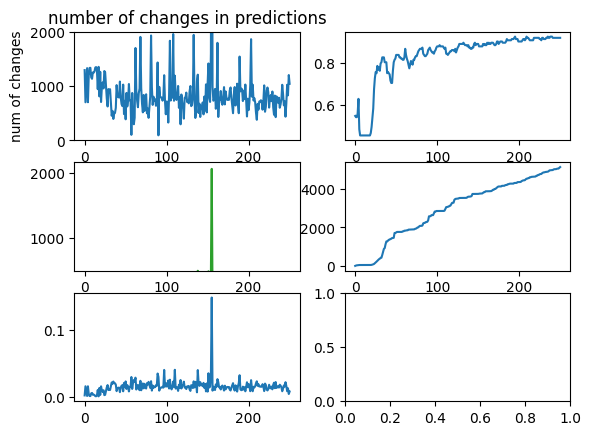

In [51]:
predictionComparisonList_overIterations = rulesResults["predictionComparisonList_overIterations"] 
num_posChange_overIteration = []
num_negChange_overIteration = []
num_noChange_overIteration = []
num_notAplicableChange_overIteration = []
num_allChanges_overIteration = []

num_posChange_overIteration_sinceBeginning = []
num_posChange_sinceBeginning =0
#num_posChange = 0
#num_negChange = 0
#num_noChange = 0
#num_notAplicableChange = 0
for i in predictionComparisonList_overIterations:
    temp_item = None
    num_posChange = 0
    num_negChange = 0
    num_noChange = 0
    num_notAplicableChange = 0
    num_allChanges = 0
    for j in i:
        for item in j: 
            if temp_item == None:

                #print(temp_item)
                pass
            elif temp_item == item:
                num_noChange += 1
            elif temp_item == 1:
                if item == 0:
                    num_negChange +=1
                elif item == -1:
                    num_notAplicableChange

            elif temp_item == 0:
                if item ==1:
                    num_posChange +=1
                    num_posChange_sinceBeginning +=1
                elif item == -1:
                    num_notAplicableChange +=1
        
            temp_item = item
        #print()
        num_allChanges = len(i) * len(j) - num_noChange

    num_allChanges_overIteration.append(num_allChanges)
    num_posChange_overIteration.append(num_posChange)
    num_negChange_overIteration.append(num_negChange)
    num_noChange_overIteration .append(num_noChange)
    num_notAplicableChange_overIteration.append(num_notAplicableChange)
    num_posChange_overIteration_sinceBeginning.append(num_posChange_sinceBeginning)

print(num_posChange_overIteration)
print(num_negChange_overIteration)
print(num_noChange_overIteration)
print(num_notAplicableChange_overIteration)

        #else:
        #    if sample == 

figAcc, axsAcc = plt.subplots(nrows=3, ncols=2)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc[0][0].set_title("number of changes in predictions")
axsAcc[0][0].set_xlabel("iteration")
axsAcc[0][0].set_ylabel("num of changes")
axsAcc[0][0].set_ylim(0, 2000) 
#axsAcc.set_yticks([0,20,40,60,80,100,110,120,130,140,])
axsAcc[1][0].plot(num_posChange_overIteration , label='num_posChange_overIteration')
axsAcc[1][0].plot(num_negChange_overIteration, label='num_negChange_overIteration')
axsAcc[0][0].plot(num_noChange_overIteration, label='num_noChange_overIteration')
axsAcc[1][0].plot(num_notAplicableChange_overIteration, label='num_notAplicableChange_overIteration')#
axsAcc[1][0].set_ylim(500)
#axsAcc[1][0].legend()

axsAcc[1][1].plot(num_posChange_overIteration_sinceBeginning, label='num_posChange_overIteration_sinceBeginning')
axsAcc[1][0].set_ylim(500)
# axsAcc[1][1].legend()

axsAcc[0][1].plot(trainResults["testAccPerIterationList"], label='testAccPerIterationList')
print(len(predictionComparisonList_overIterations[100]))
print(len(i) * len(j))
print(len(predictionComparisonList_overIterations))

axsAcc[2][0].plot((np.array(num_allChanges_overIteration) / (len(predictionComparisonList_overIterations) * len(predictionComparisonList_overIterations[0]))) , label= "a")
#axsAcc[2][0].legend()


In [8]:
for i in trainResults:
    print(i)

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration
Total_gradientsList_iteration


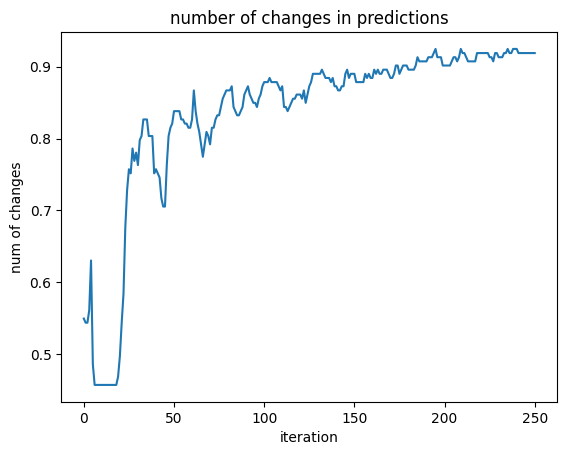

In [34]:
figAcc, axsAcc = plt.subplots(nrows=1, ncols=1)

    #data = utils.loadData(dataPath+ "data.npz")

axsAcc.set_title("number of changes in predictions")
axsAcc.set_xlabel("iteration")
axsAcc.set_ylabel("num of changes")

#a = np.load("./WorkingResults/total_gradientsListAveraged", allow_pickle=True)

#axsAcc.set_yticks([0,20,40,60,80,100,110,120,130,140,])
axsAcc.plot(trainResults["testAccPerIterationList"], label='testAccPerIterationList')
#a


In [10]:
for i in trainResults:
    print(i)

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration
Total_gradientsList_iteration


In [11]:
featureListALL= data["featureListALL"]
featureListALL0= data["featureListALL_0"]

training_acc = data["training_acc"]

#600 trainingdatapoints 
print(len(featureListALL[0]))
sizeDS = 455
for i in range(300):
    #print(featureListALL[0][0:4])
    print(featureListALL[0][i*sizeDS:i*sizeDS +6])
    print(featureListALL0[0][i*sizeDS:i*sizeDS +6])

# optimizer.step() after optimizer.zero_grad()

NameError: name 'data' is not defined

In [ ]:
data =np.load("/home/rosario/explainable/Bachelor/test/Results/seedNum_0_BinaryClassification_KaggleDiabetesALL_Num_Epochs_500batchSize_4_0.001_2023-02-02_131052/data.npz")

for i in data:
    print(i)

featureListALL= data["featureListALL"]
featureListALL0= data["featureListALL_0"]

training_acc = data["training_acc"]

#600 trainingdatapoints 
print(len(featureListALL[0]))
sizeDS = 455
for i in range(300):
    #print(featureListALL[0][0:4])
    print(featureListALL[0][i*sizeDS:i*sizeDS +6])
    print(featureListALL0[0][i*sizeDS:i*sizeDS +6])



featureListALL
featureListALL_0
training_acc
test_acc
training_loss_epoch
training_loss_batch
test_loss_epoch
test_loss_batch
227500
[-0.00698076 -0.0085027  -0.00801412 -0.00801412 -0.00800764 -0.00800764]
[-0.00698141 -0.00850374 -0.00801519 -0.00801519 -0.00801412 -0.00801412]
[-0.00670403 -0.00670905 -0.00619547 -0.00759588 -0.00758976 -0.00758976]
[-0.00670447 -0.00670954 -0.00619596 -0.00759663 -0.00759588 -0.00759588]
[-0.0065961  -0.00643485 -0.00539484 -0.0072094  -0.00720358 -0.00720358]
[-0.00659637 -0.00643515 -0.00539516 -0.00720986 -0.0072094  -0.0072094 ]
[-0.00635397 -0.00617552 -0.00511766 -0.00562402 -0.00684532 -0.00684532]
[-0.00635408 -0.00617565 -0.00511777 -0.0056241  -0.00685089 -0.00685089]
[-0.0019936  -0.00455154 -0.00118515 -0.00276023  0.00183943 -0.00276419]
[-0.00199368 -0.00455161 -0.00118526 -0.00276038  0.00184444 -0.00276023]
[-0.00219194 -0.00226218 -0.00140919 -0.00298498  0.00022611 -0.00298882]
[-0.00219222 -0.00226247 -0.00140952 -0.0029853   0.0